## Pre Processing

####  The purpose of this program is to clear the csv files containing CICIDS2017 data from errors.
####  the faults observed are:
####      1-   288602 of the entries in the file "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv" are empty / meaningless.
####                   (e.g. ",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,")
####
####      2-  In the original csv files, while describing the Web Attack types such as Brute Force, XSS, Sql Injection, the character used is not recognized
####                    by the Python-Pandas library and leads to the error.
####                   this character ("–", Unicode code:8211) has been changed with another character ("-", Unicode code:45) to correct the error.
####
####   After the error correction, all the csv files were made into a single file (all_date.csv) to make it easier to process.


In [1]:
# IMPORTS OF MODULES
import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

In [2]:
print("This process may take 5 to 10 minutes, depending on the performance of your computer.\n\n\n")
number="0123456789"
# CSV files names:
csv_files=os.listdir('./DATA/') ## ALL DATA SHOULD BE UNDER THE FOLDER IN SAME DIRECTORY NAMED "DATA"

# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]

main_labels2=main_labels
main_labels=( ",".join( i for i in main_labels ) )
main_labels=main_labels+"\n"
main_labels
flag=True

for i in range(len(csv_files)):
    print('FILENAME :',str(csv_files[i]))
    ths = open(str(csv_files[i]), "w")
    ths.write(main_labels)
    with open("./DATA/"+csv_files[i], "r") as file:
        print('REMOVING THE inf,NaN and other errors')
        while True:
            try:
                line=file.readline()
                if  line[0] in number:# this line eliminates the headers of CSV files and incomplete streams .
                    if " – " in str(line): ##  if there is "–" character ("–", Unicode code:8211) in the flow ,  it will be chanced with "-" character ( Unicode code:45).
                        line=(str(line).replace(" – "," - "))
                    line=(str(line).replace("inf","0"))
                    line=(str(line).replace("Infinity","0"))
                    line=(str(line).replace("NaN","0"))
                    ths.write(str(line))
                else:
                    continue                       
            except:
                break
    ths.close()
 
    df=pd.read_csv(str(csv_files[i]),low_memory=False)
    df=df.fillna(0)
    
    string_features=["Flow Bytes/s","Flow Packets/s"]
    for ii in string_features: #Some data in the "Flow Bytes / s" and "Flow Packets / s" columns are not numeric. Fixing this bug in this loop
        df[ii]=df[ii].replace('Infinity', -1)
        df[ii]=df[ii].replace('NaN', 0)
        number_or_not=[]
        for iii in df[ii]:
            try:
                k=int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii]=number_or_not



    string_features=[]
    for j in main_labels2: # In this section, non-numeric (string and / or categorical) properties (columns) are detected.
        if df[j].dtype=="object":
            string_features.append(j)
    try:
        string_features.remove('Label')#The "Label" property was removed from the list. Because it has to remain "categorical" for using with different machine learning approach.
    except:
        print("error!")
    labelencoder_X = preprocessing.LabelEncoder()


    print('LABEL ENCODING')
    for ii in string_features: ## In this loop, non-numeric (string and/or categorical) properties converted to numeric features.
        try:
            df[ii]=labelencoder_X.fit_transform(df[ii])
        except:
            df[ii]=df[ii].replace('Infinity', -1)
    df=df.drop(main_labels2[61], axis=1) ## Column 61 is deleted because it is unnecessary, column 41 ("Fwd Header Length" feature) had be mistakenly rewritten.


    print('MERGING INTO ONE FILE')
    ##All CSV files are merged into a single file.
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")
    #os.remove(str(csv_files[i]))
    print("The pre-processing phase of the ",csv_files[i]," file is completed.\n")
    

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

This process may take 5 to 10 minutes, depending on the performance of your computer.



FILENAME : Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  file is completed.

FILENAME : Monday-WorkingHours.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Monday-WorkingHours.pcap_ISCX.csv  file is completed.

FILENAME : Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  file is completed.

FILENAME : Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
REMOVING THE inf,NaN and other errors
LABEL ENCODING
MERGING INTO ONE FILE
The pre-processing phase of the  Thursday-WorkingHours-Morning-W

## STATISTICS OF THE DATA

###### The data will not be equally divided into labels which can make the model learn wrong as it always give more weight to BENIGN. To avoid that we will reduce the data

##### Also the data is too big to be used in this processor. So we will go for reduction of data option .  :-)
### Lets see the actual data.

In [1]:
'''
  all_data.csv files is required for the operation of the program.
  all_data.csv file must be located in the same directory as the program.

  The purpose of this program is to provide statistics about the data contained in the dataset.
  Considering that some of the data are very large and some of them are very small, 
  the graphics are created in three separate groups, so that all data can be seen:
        big: labels with more than 11000 numbers
        medium: labels with numbers between 600 and 11000
        small: labels with fewer than 600 numbers
'''


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

In [4]:
## TIME TAKING CELL :(
df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())

BENIGN              2117531
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64


There are total attacks : 555466 out of total data of 2672997
BENIGN %79.0
ATTACK %21.0


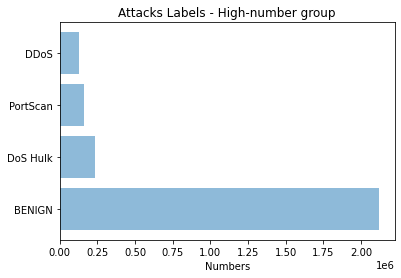

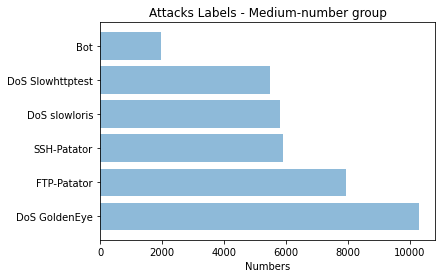

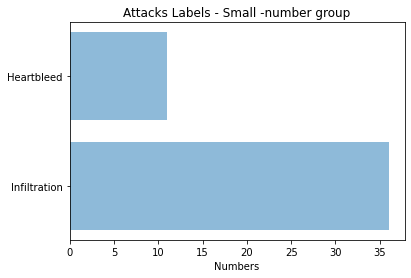

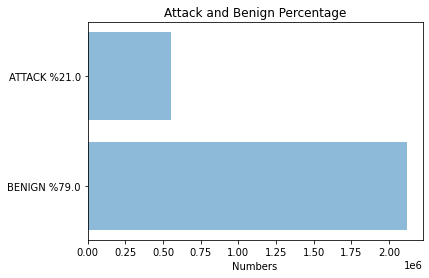

mission accomplished!
Total operation time: =  378.0513355731964 seconds


In [6]:
## WHOLE DATA IS FAVOURING THE BENIGN label... 
key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attack=0
benign=0

## the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attack+=values[i]
        
key =[benign,attack]

print('There are total attacks :',attack,'out of total data of',attack+benign)

#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attack),2)*100),
        "ATTACK %"+str(round(attack/(benign+attack),2)*100)]
print(labels[0])
print(labels[1])
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")



print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")